<a href="https://colab.research.google.com/github/piyushsrivastav/BankLoan-Defaulter/blob/main/AML%20Bank%20Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Read the dataset and display some information about the dataset.

- Import required libraries and read the dataset. 
- Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [1]:
#import 
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# !pip install featuretools
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
#import featuretools as ft
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold




import lightgbm as lgb
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 100)

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Load datasets

In [2]:
data = pd.read_csv("bank_loan_defaulter.csv")
data.set_index('ID', inplace=True)
print(f"data: {data.shape}")
data.head()

data: (67463, 34)


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


# 2. Data cleansing and Exploratory data analysis:

- Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.
- Check summary statistics of the dataset, and write your key observations.
- Drop the columns which you think redundant for the analysis. 
- Perform necessary univariate and multivariate analysis. 
- Check the distribution of the target column 'Loan Status', and comment on the class distribution

In [3]:
#check duplicate values

In [4]:
duplicate_df=data.duplicated()
print(list(duplicate_df).count("True"))

0


In [5]:
#checking null values
percent_missing = data.isnull(). sum() * 100 / len(data)
percent_missing

Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical    0.0
Application Type            

In [6]:
##Statistical Summary (categorical and numerical)

In [7]:
data.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [8]:
data.describe(include="O")

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


We can observe that the dataset has few redundant columns, though the loan amount is 67463. There are total of 41 batch enrolled. The frequency of batch enrolled is 3626.

### Target Examine

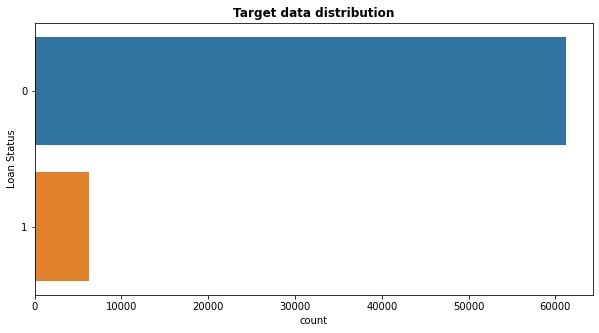

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Loan Status', data=data)
plt.title("Target data distribution", fontweight='bold');

### Loan Amount

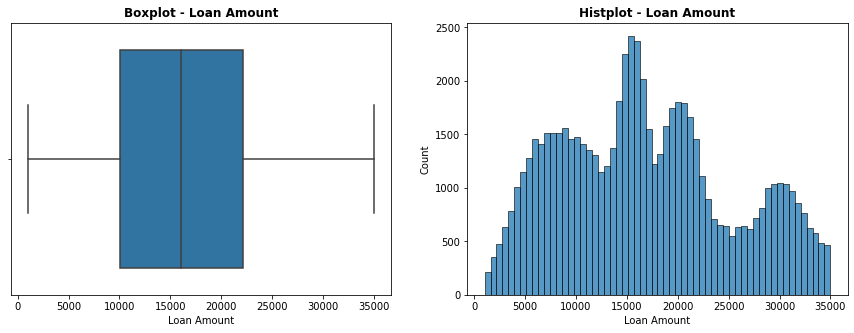

In [10]:
col = 'Loan Amount'
x1 = data[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

The Load amount is lying at 15k to 20k along with outliers

### Funded Amount

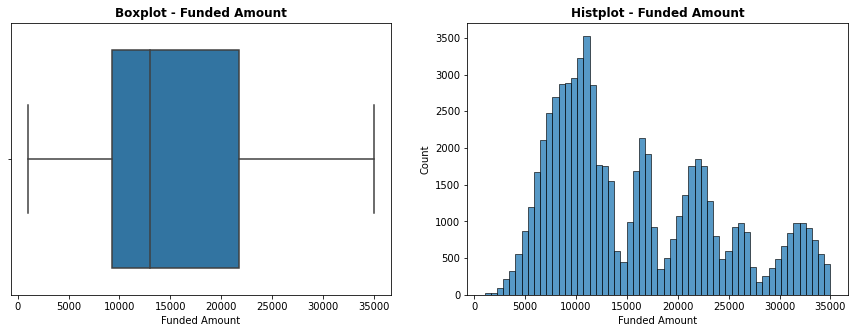

In [11]:
col = 'Funded Amount'
x1 = data[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

The funded amount is more on 10k mount while all denominations of amount till 35k is funded

### Funded Amount Investor

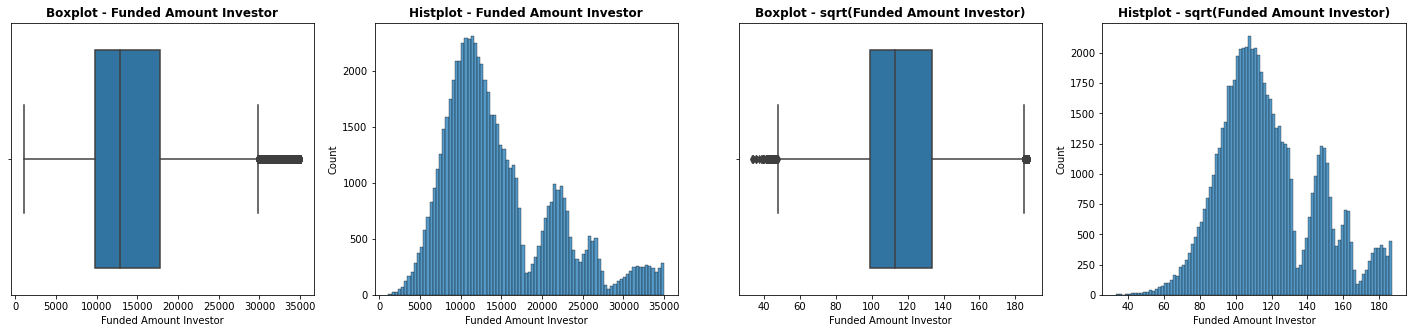

In [12]:
col = 'Funded Amount Investor'
x1 = data[col]
x2 = np.sqrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - sqrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - sqrt({col})", fontweight='bold');

The funded amount approved by investor can also be understood from previous distributions.

In [13]:
data['Funded Amount Investor'] = np.sqrt(data['Funded Amount Investor'])

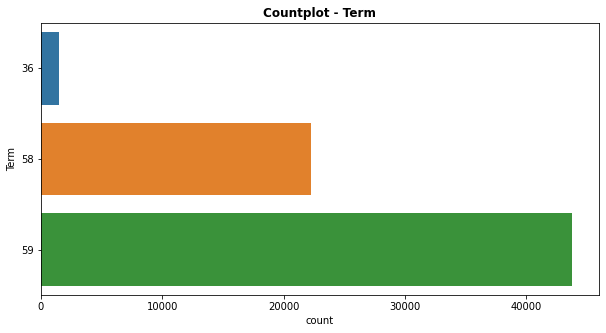

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Term', data=data)
plt.title("Countplot - Term", fontweight='bold');

The term of loan is mostly on 59 months

### Batch Enrolled

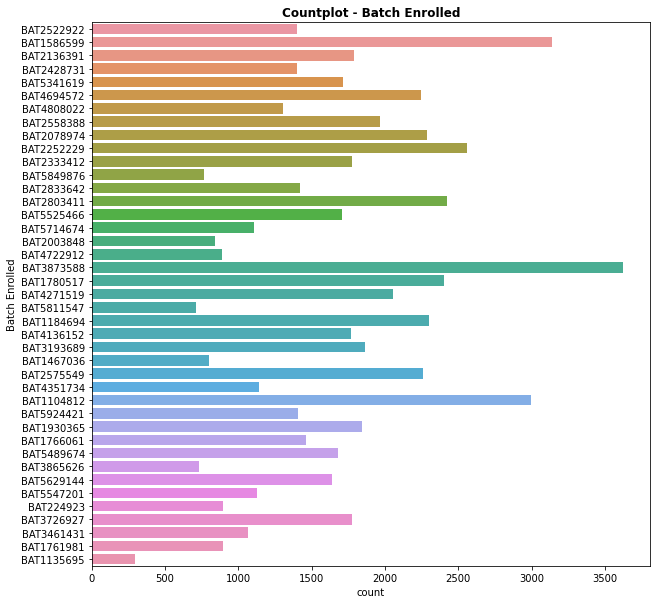

In [15]:
plt.figure(figsize=(10, 10))
sns.countplot(y='Batch Enrolled', data=data)
plt.title("Countplot - Batch Enrolled", fontweight='bold');

The batch enrolled distribution can be understood from the above. Encoding the 'Batch Enrolled'for better understanding

In [16]:
le = LabelEncoder().fit(data['Batch Enrolled'])
data['Batch Enrolled'] = le.transform(data['Batch Enrolled'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,111.037664,59,16,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1450153,3609,11940,110.417376,59,4,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
1969101,28276,9311,146.980354,59,11,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
6651430,11170,6954,133.705482,59,15,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
14354669,16890,13226,116.361191,59,32,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


### Interest Rate

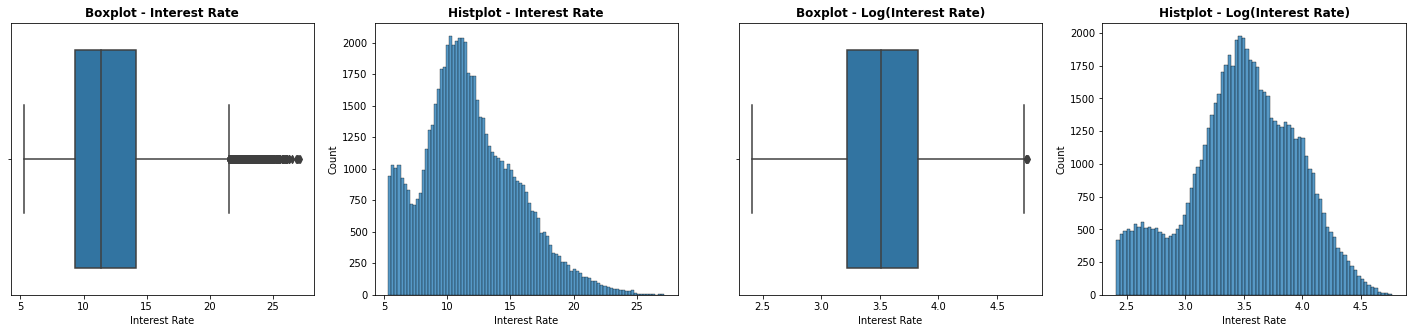

In [17]:
col = 'Interest Rate'
x1 = data[col]
x2 = np.log2(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - Log({col})", fontweight='bold');
ax[3].set_title(f"Histplot - Log({col})", fontweight='bold');

The interest is more on 10k amount while less when more amount is taken as loan

## Interest Amount

In [18]:
data['Interest Amount'] = data['Interest Rate'] * data['Loan Amount']

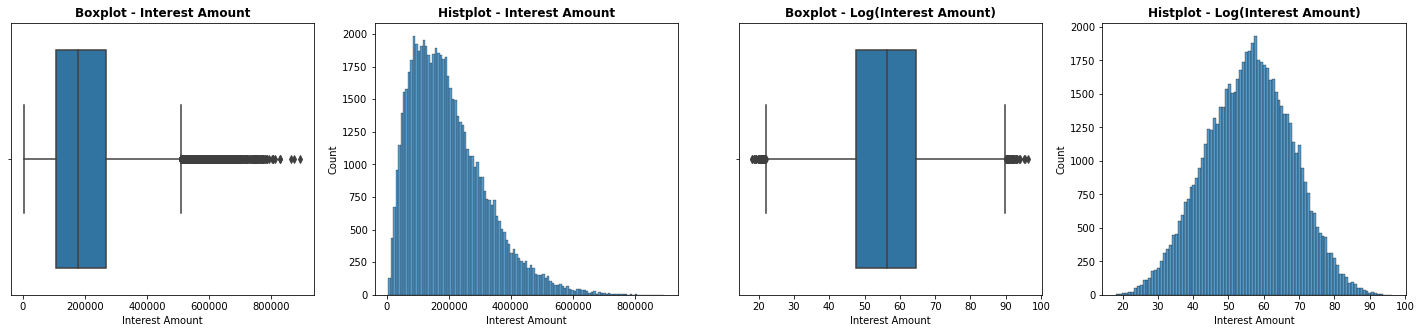

In [19]:
col = 'Interest Amount'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - Log({col})", fontweight='bold');
ax[3].set_title(f"Histplot - Log({col})", fontweight='bold');

In [20]:
data['Interest Rate'] = np.log2(data['Interest Rate'])
data['Interest Amount'] = np.cbrt(data['Interest Amount'])

### Grade and Sub-Grade

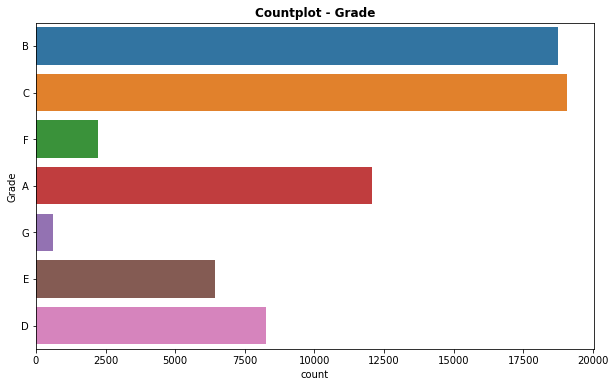

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Grade', data=data)
plt.title("Countplot - Grade", fontweight='bold');

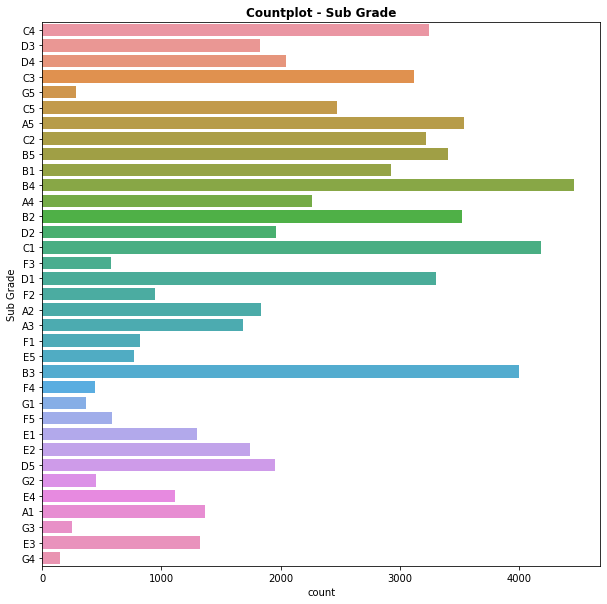

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot(y='Sub Grade', data=data)
plt.title("Countplot - Sub Grade", fontweight='bold');

Distribution of Grade and Subgrade. While encoding the same for better model building

In [23]:
le = LabelEncoder().fit(data['Grade'])
data['Grade'] = le.transform(data['Grade'])

In [24]:
le = LabelEncoder().fit(data['Sub Grade'])
data['Sub Grade'] = le.transform(data['Sub Grade'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Interest Amount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,111.037664,59,16,3.477031,1,13,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,48.109425
1450153,3609,11940,110.417376,59,4,3.613244,2,17,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,35.347655
1969101,28276,9311,146.980354,59,11,3.649142,5,18,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,70.790190
6651430,11170,6954,133.705482,59,15,4.064469,2,12,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,57.173323
14354669,16890,13226,116.361191,59,32,3.907689,2,18,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,63.287856


### Employment Duration

Text(0.5, 1.0, 'Countplot - Employment Duration')

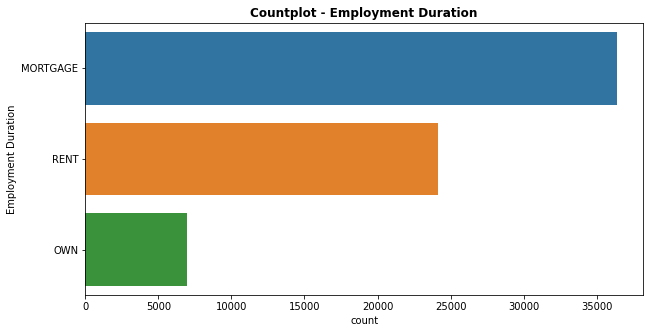

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Employment Duration', data=data)
plt.title("Countplot - Employment Duration", fontweight='bold')

Employement duration is most for mortgage. also encoding this categorical column

In [26]:
le = LabelEncoder().fit(data['Employment Duration'])
data['Employment Duration'] = le.transform(data['Employment Duration'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Interest Amount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,111.037664,59,16,3.477031,1,13,0,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,48.109425
1450153,3609,11940,110.417376,59,4,3.613244,2,17,2,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,35.347655
1969101,28276,9311,146.980354,59,11,3.649142,5,18,0,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,70.790190
6651430,11170,6954,133.705482,59,15,4.064469,2,12,0,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,57.173323
14354669,16890,13226,116.361191,59,32,3.907689,2,18,0,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,63.287856


### Home Ownership

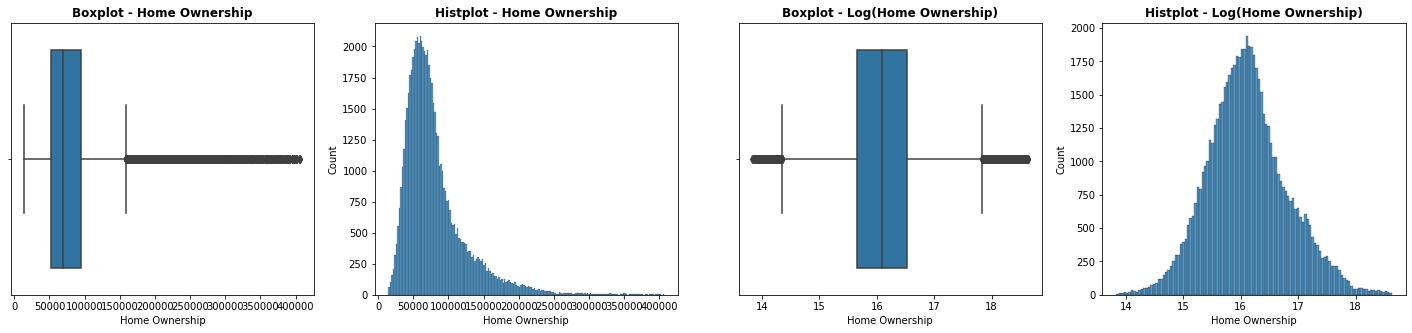

In [27]:
col = 'Home Ownership'
x1 = data[col]
x2 = np.log2(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - Log({col})", fontweight='bold');
ax[3].set_title(f"Histplot - Log({col})", fontweight='bold');

In [28]:
data['Home Ownership'] = np.log2(data['Home Ownership'])

Home ownership is mostly on 50K

### Verification Status

Text(0.5, 1.0, 'Countplot - Verification Status')

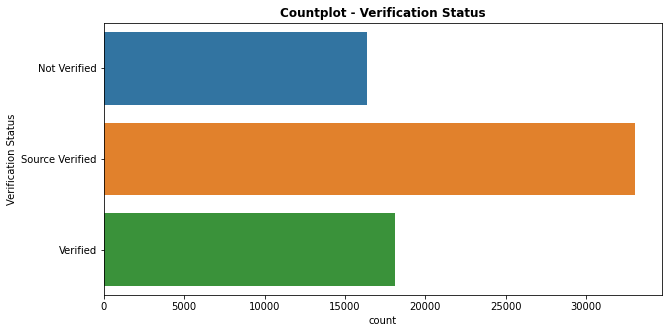

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Verification Status', data=data)
plt.title("Countplot - Verification Status", fontweight='bold')

Verification is done for most cases, encoding the same column

In [30]:
le = LabelEncoder().fit(data['Verification Status'])
data['Verification Status'] = le.transform(data['Verification Status'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Interest Amount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,111.037664,59,16,3.477031,1,13,0,17.428054,0,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,48.109425
1450153,3609,11940,110.417376,59,4,3.613244,2,17,2,15.281710,1,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,35.347655
1969101,28276,9311,146.980354,59,11,3.649142,5,18,0,16.481590,1,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,70.790190
6651430,11170,6954,133.705482,59,15,4.064469,2,12,0,16.724495,1,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,57.173323
14354669,16890,13226,116.361191,59,32,3.907689,2,18,0,15.432895,1,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,63.287856


### Loan Title

In [31]:
load_title_dict = {
    'Bathroom': 'Bathroom',
    'Bill Consolidation': 'Bills',
    'Bill Payoff': 'Bills',
    'bills': 'Bills',
    'Business': 'Business',
    'Car financing': 'Car',
    'Car Loan': 'Car',
    'Card Consolidation': 'Cards',
    'cards': 'Cards',
    'Cards': 'Cards',
    'CC': 'CC',
    'CC consolidation': 'CC',
    'CC Consolidation': 'CC',
    'CC Loan': 'CC',
    'CC Refi': 'CC',
    'CC Refinance': 'CC',
    'CC-Refinance': 'CC',
    'conso': 'Consolidate',
    'consolidate': 'Consolidate',
    'Consolidate': 'Consolidate',
    'CONSOLIDATE': 'Consolidate',
    'Consolidated': 'Consolidate',
    'Consolidation': 'Consolidate',
    'consolidation': 'Consolidate',
    'CONSOLIDATION': 'Consolidate',
    'consolidation loan': 'Consolidate',
    'Consolidation Loan': 'Consolidate',
    'Credit': 'Credit Card',
    'credit card': 'Credit Card',
    'Credit Card': 'Credit Card',
    'credit card consolidation': 'Credit Card',
    'Credit Card Consolidation': 'Credit Card',
    'Credit Card consolidation': 'Credit Card',
    'Credit Card Debt': 'Credit Card Debt',
    'Credit Card Loan': 'Credit Card Loan',
    'Credit card pay off': 'Credit Card Payoff',
    'Credit Card Paydown': 'Credit Card Paydown',
    'Credit card payoff': 'Credit Card Payoff',
    'Credit Card Payoff': 'Credit Card Payoff',
    'Credit Card Refi': 'Credit Card Refinance',
    'Credit Card Refinance': 'Credit Card Refinance',
    'credit card refinance': 'Credit Card Refinance',
    'Credit card refinance': 'Credit Card Refinance',
    'Credit Card Refinance Loan': 'Credit Card Refinance',
    'Credit card refinancing': 'Credit Card Refinance',
    'Credit Cards': 'Credit Card',
    'Credit Consolidation': 'Credit Card',
    'Credit Loan': 'Credit Card',
    'credit pay off': 'Credit Card Payoff',
    'Credit payoff': 'Credit Card Payoff',
    'debt': 'Debt Consolidation',
    'Debt': 'Debt Consolidation',
    'Debt Consolidation': 'Debt Consolidation',
    'Debt consolidation': 'Debt Consolidation',
    'DEBT CONSOLIDATION': 'Debt Consolidation',
    'debt consolidation': 'Debt Consolidation',
    'Debt Consolidation 2013': 'Debt Consolidation',
    'Debt Consolidation Loan': 'Debt Consolidation',
    'debt consolidation loan': 'Debt Consolidation',
    'Debt Free': 'Debt Free',
    'debt loan': 'Debt Loan',
    'Debt Loan': 'Debt Loan',
    'Debt Payoff': 'Debt Payoff',
    'Debt payoff': 'Debt Payoff',
    'Debt Reduction': 'Debt Reduction',
    'Dept consolidation': 'Debt Consolidation',
    'Freedom': 'Freedom',
    'Get Debt Free': 'Get Debt Free',
    'get out of debt': 'get out of debt',
    'Getting Ahead': 'Getting Ahead',
    'Green loan': 'Green loan',
    'Home': 'Home',
    'Home buying': 'Home',
    'Home improvement': 'Home',
    'Home Improvement': 'Home',
    'home improvement': 'Home',
    'Home Improvement Loan': 'Home',
    'Home loan': 'Home',
    'House': 'Home',
    'Lending Club': 'Lending Club',
    'Lending loan': 'Lending loan',
    'Loan': 'Loan',
    'Loan 1': 'Loan',
    'Loan Consolidation': 'Loan',
    'loan1': 'Loan',
    'Major purchase': 'Major purchase',
    'Medical': 'Medical',
    'Medical expenses': 'Medical',
    'Medical loan': 'Medical',
    'Moving and relocation': 'Moving and relocation',
    'My Loan': 'My Loan',
    'MYLOAN': 'My Loan',
    'Other': 'Other',
    'Pay Off': 'Pay Off',
    'pay off bills': 'Pay Off',
    'payoff': 'Pay Off',
    'Payoff': 'Pay Off',
    'Personal': 'Personal',
    'personal': 'Personal',
    'Personal Loan': 'Personal',
    'Personal loan': 'Personal',
    'Pool': 'Pool',
    'refi': 'Refinance',
    'Refinance': 'Refinance',
    'Refinance Loan': 'Refinance',
    'relief': 'relief',
    'Vacation': 'Vacation',
    'vacation': 'Vacation',
    'Wedding Loan': 'Wedding Loan'
}

In [32]:
data['Loan Title'] = data['Loan Title'].map(load_title_dict)

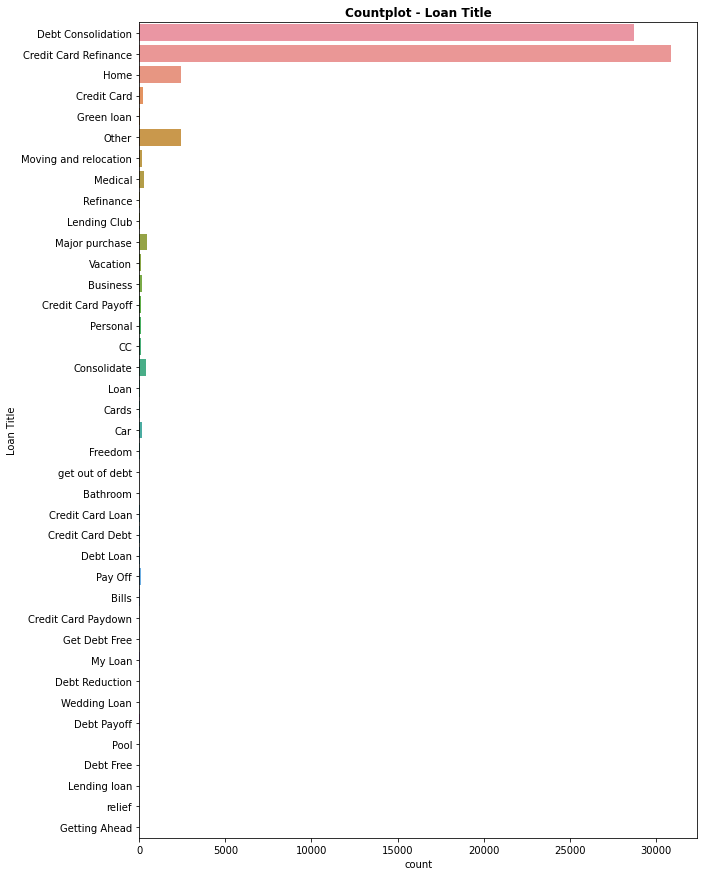

In [33]:
plt.figure(figsize=(10, 15))
sns.countplot(y='Loan Title', data=data)
plt.title("Countplot - Loan Title", fontweight='bold');

In [34]:
le = LabelEncoder().fit(data['Loan Title'])
data['Loan Title'] = le.transform(data['Loan Title'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Interest Amount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,111.037664,59,16,3.477031,1,13,0,17.428054,0,n,13,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,48.109425
1450153,3609,11940,110.417376,59,4,3.613244,2,17,2,15.281710,1,n,13,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,35.347655
1969101,28276,9311,146.980354,59,11,3.649142,5,18,0,16.481590,1,n,13,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,70.790190
6651430,11170,6954,133.705482,59,15,4.064469,2,12,0,16.724495,1,n,13,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,57.173323
14354669,16890,13226,116.361191,59,32,3.907689,2,18,0,15.432895,1,n,12,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,63.287856


### Debit to Income

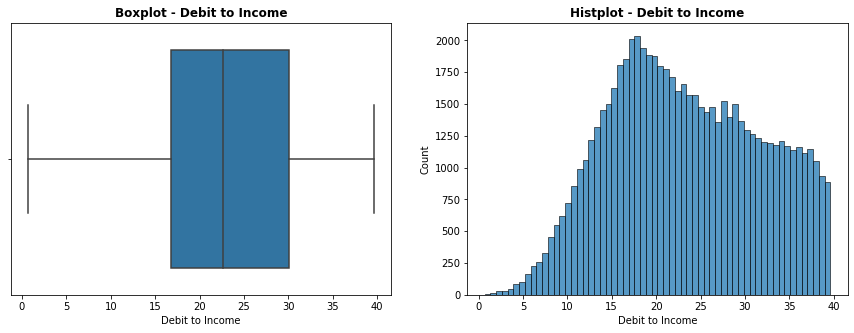

In [35]:
col = 'Debit to Income'
x1 = data[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

### Revolving Balance

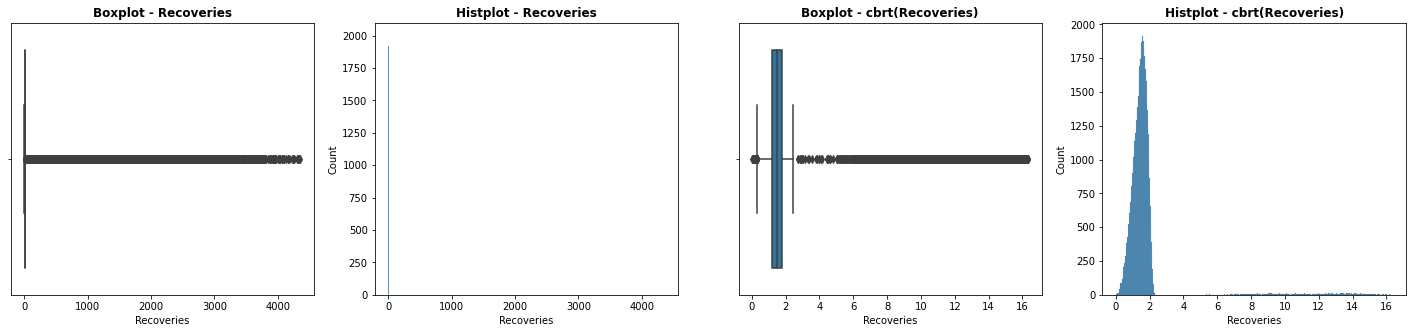

In [36]:
col = 'Recoveries'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [37]:
data['Recoveries'] = np.cbrt(data['Recoveries'])

### Revolving Utilities

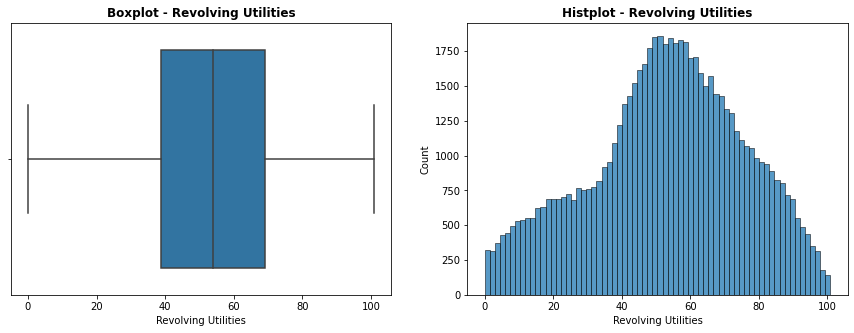

In [38]:
col = 'Revolving Utilities'
x1 = data[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

### Initial List Status

Text(0.5, 1.0, 'Countplot - Initial List Status')

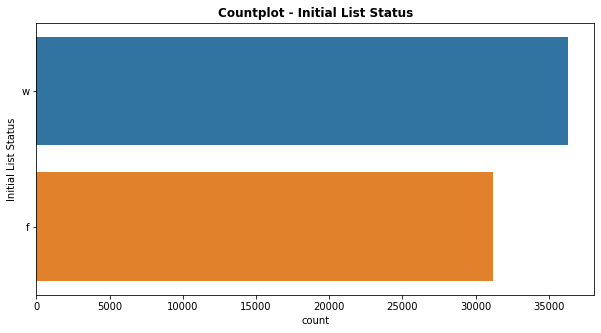

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Initial List Status', data=data)
plt.title("Countplot - Initial List Status", fontweight='bold')

In [40]:
data['Initial List Status'] = data['Initial List Status'].map({'f':0, 'w':1})

### Total Received Interest

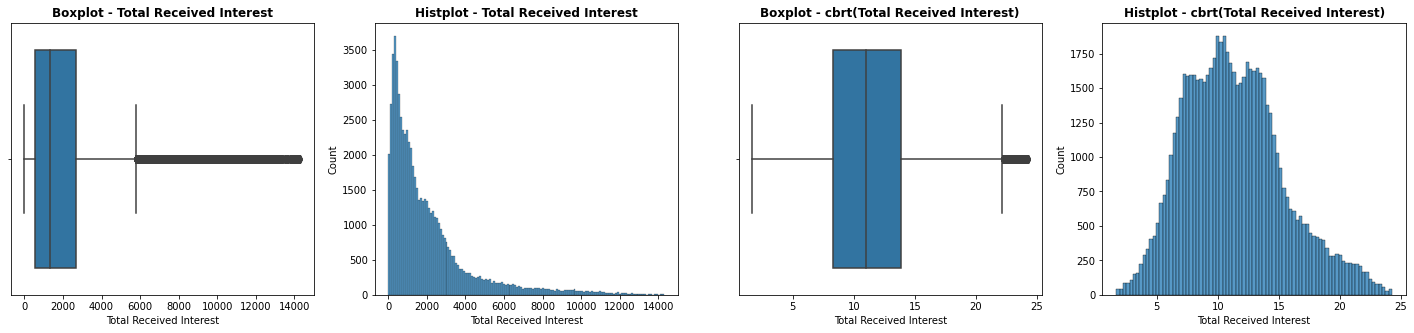

In [41]:
col = 'Total Received Interest'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [42]:
data['Total Received Interest'] = np.cbrt(data['Total Received Interest'])

### Total Received Late Fee

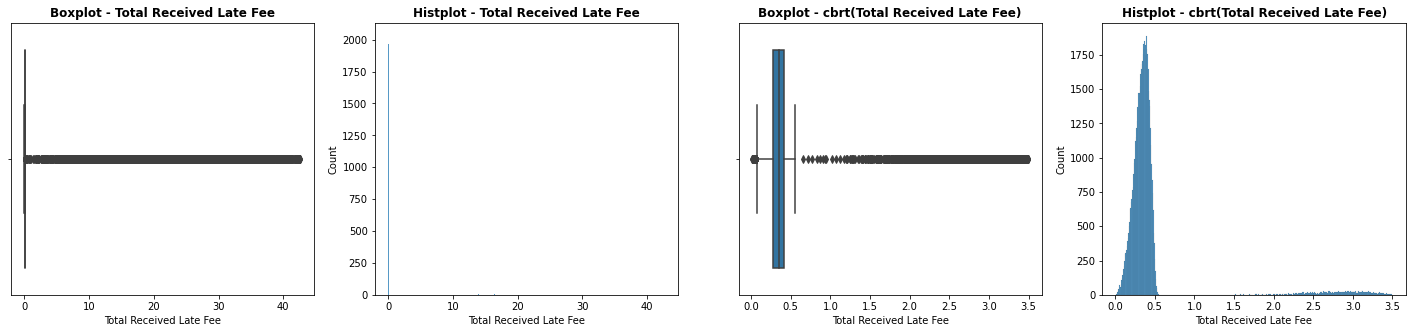

In [43]:
col = 'Total Received Late Fee'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [44]:
data['Total Received Late Fee'] = np.cbrt(data['Total Received Late Fee'])

### Recoveries

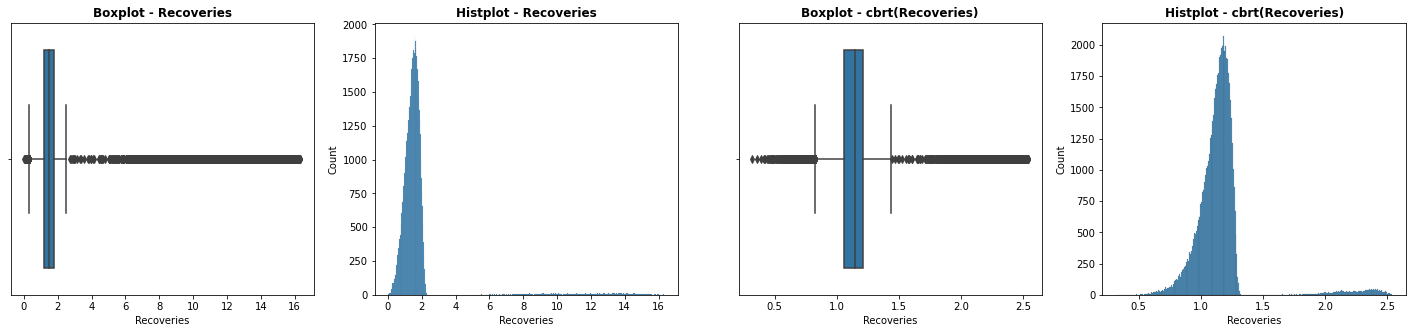

In [45]:
col = 'Recoveries'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [46]:
data['Recoveries'] = np.cbrt(data['Recoveries'])

### Collection Recovery Fee

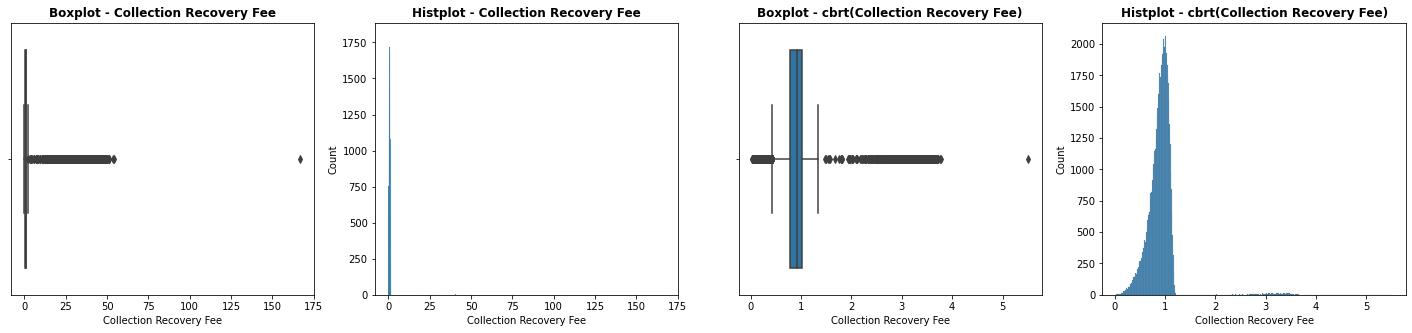

In [47]:
col = 'Collection Recovery Fee'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [48]:
data['Collection Recovery Fee'] = np.cbrt(data['Collection Recovery Fee'])

### Collection 12 months Medical

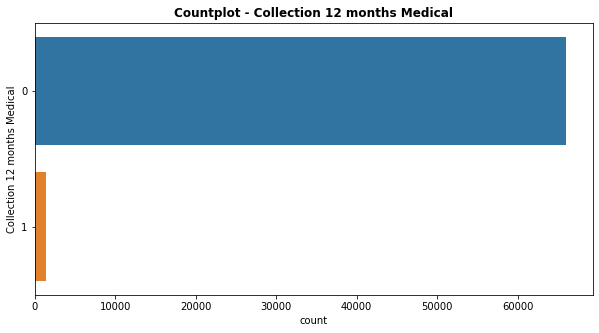

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Collection 12 months Medical', data=data)
plt.title("Countplot - Collection 12 months Medical", fontweight='bold');

### Application Type

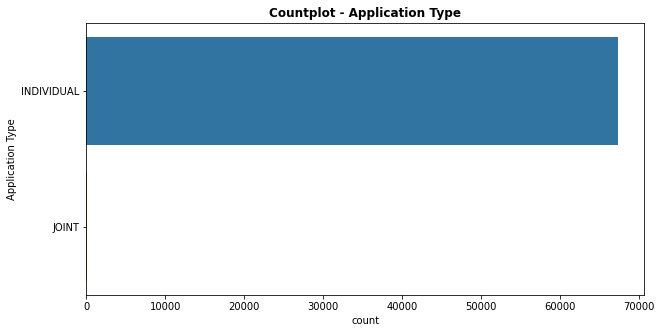

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Application Type', data=data)
plt.title("Countplot - Application Type", fontweight='bold');

In [51]:
data['Application Type'] = data['Application Type'].map({'INDIVIDUAL':0, 'JOINT':1})

### Total Collection Amount

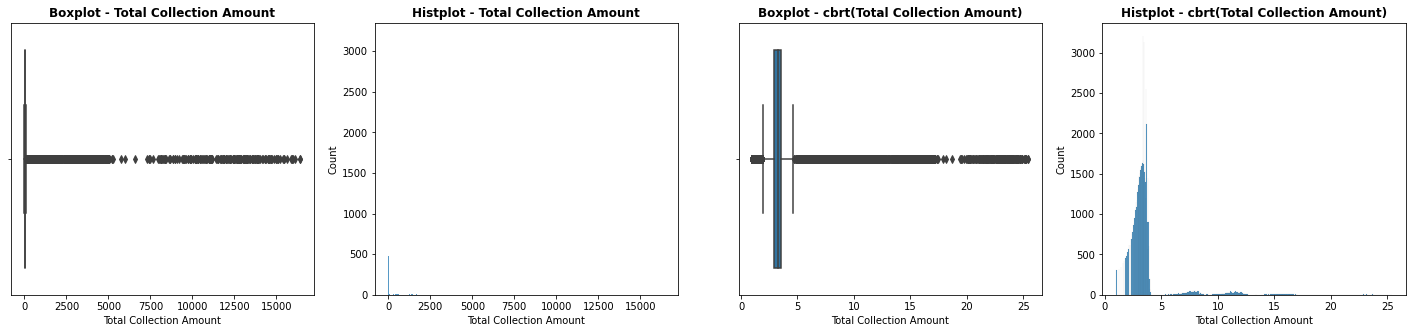

In [52]:
col = 'Total Collection Amount'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [53]:
data['Total Collection Amount'] = np.cbrt(data['Total Collection Amount'])

### Total Current Balance

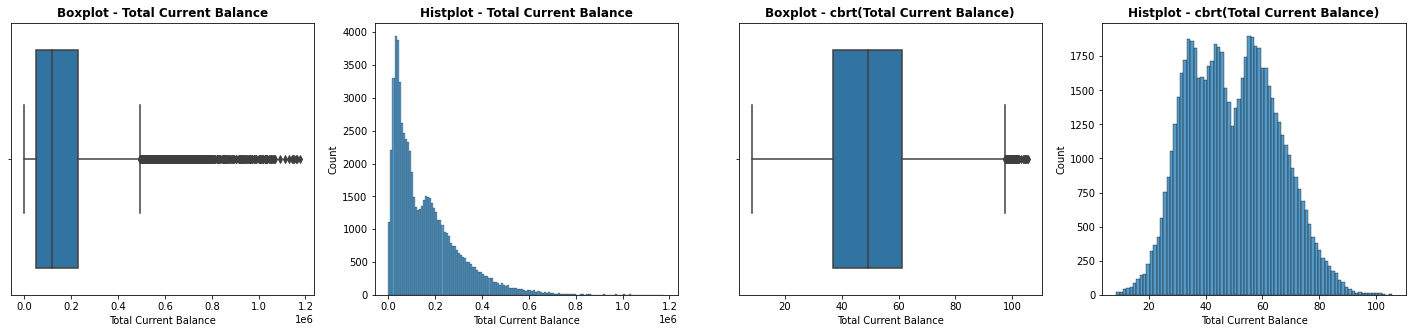

In [54]:
col = 'Total Current Balance'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [55]:
data['Total Current Balance'] = np.cbrt(data['Total Current Balance'])

# Total Revolving Credit Limit

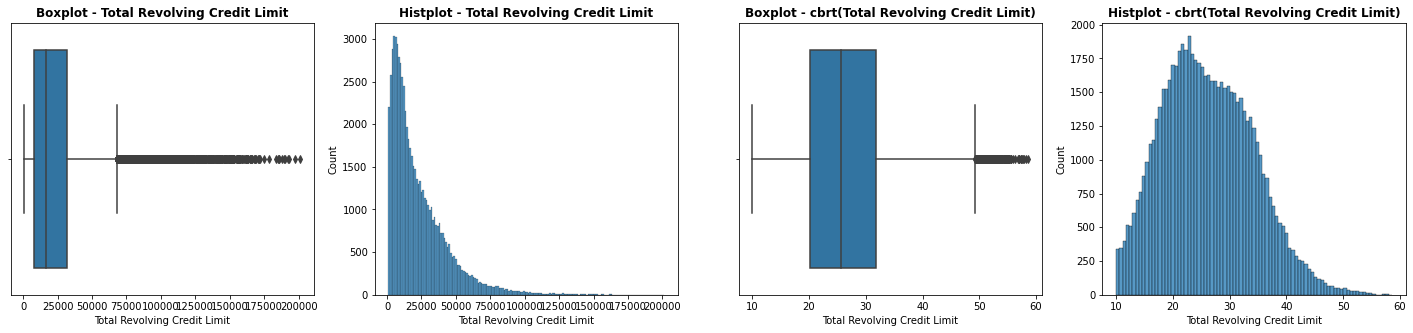

In [56]:
col = 'Total Revolving Credit Limit'
x1 = data[col]
x2 = np.cbrt(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');
ax[2].set_title(f"Boxplot - cbrt({col})", fontweight='bold');
ax[3].set_title(f"Histplot - cbrt({col})", fontweight='bold');

In [57]:
data['Total Revolving Credit Limit'] = np.cbrt(data['Total Revolving Credit Limit'])

# 3.Data preparation for model building:

- Segregate the target and independent features.
- Encode the categorical data.
- Handle the imbalanced data using oversampling or under sampling approach, and check the distribution of the re-sampled target class.
- Split the data into train and test. 
- Select the K best features using wrapper or embedded method

## Feature Correlation

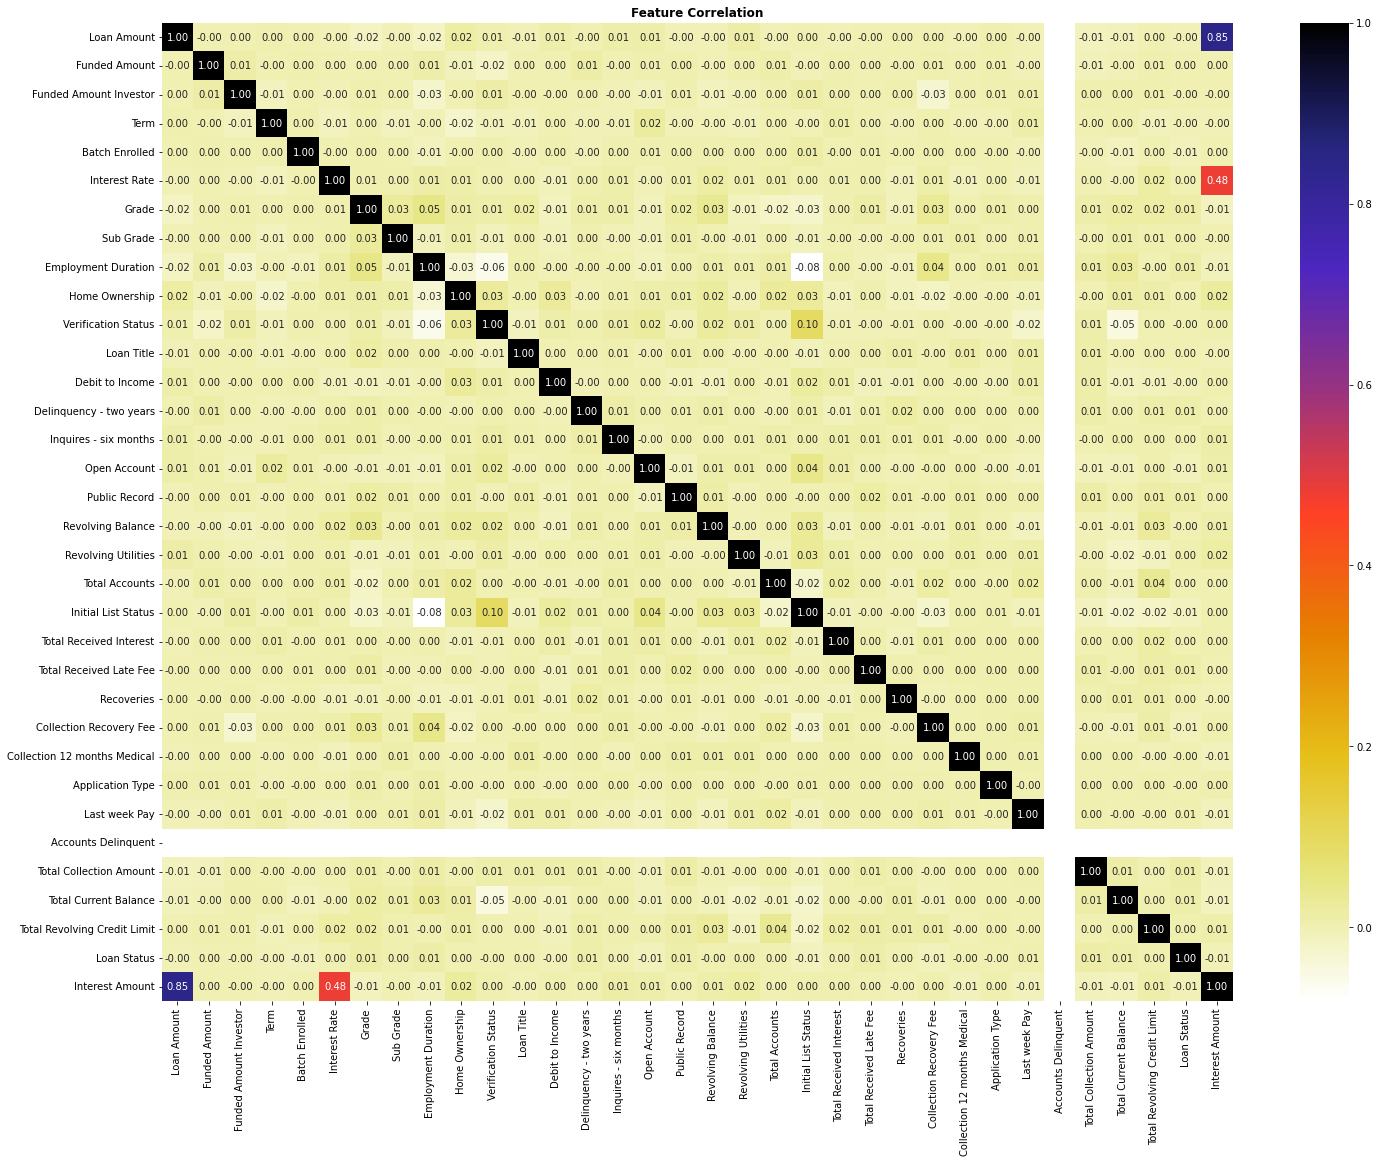

In [58]:
plt.subplots(1,1,figsize=(24, 18))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="CMRmap_r")
plt.title("Feature Correlation", fontweight='bold');

### Feature Engineering

In [59]:
data_y = data['Loan Status'].copy()
data.drop(['Payment Plan','Accounts Delinquent','Loan Status'], axis=1, inplace=True)

In [60]:
cat_cols =["Batch Enrolled","Grade",
           "Sub Grade","Employment Duration","Delinquency - two years",
           "Verification Status","Loan Title",
           "Inquires - six months","Open Account",
           "Public Record","Initial List Status",
           "Collection 12 months Medical","Application Type"]

num_cols = [col for col in data.columns if col not in cat_cols]
num_cols.append('ID')

len(cat_cols), len(num_cols)

(13, 20)

In [61]:
data.reset_index(inplace=True)
feature_df= data[num_cols]
feature_df.head(3)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Interest Amount,ID
0,10000,32236,111.037664,59,3.477031,17.428054,16.284758,24246,74.932551,7,14.308861,0.467317,1.107089,0.925884,49,3.141381,67.773540,18.775757,48.109425,65087372
1,3609,11940,110.417376,59,3.613244,15.281710,15.412409,812,78.297186,13,9.176632,0.330746,1.100995,0.991536,109,3.756286,56.733754,27.538788,35.347655,1450153
2,28276,9311,146.980354,59,3.649142,16.481590,28.137619,1843,2.073040,20,9.521923,2.657999,1.176434,1.006647,66,3.239612,44.780993,29.683714,70.790190,1969101


In [65]:
# Install package
!pip install featuretools
import featuretools as ft

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 7.9 MB/s 
     |████████████████████████████████| 291 kB 60.5 MB/s 
     |████████████████████████████████| 207 kB 56.6 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


In [66]:
es = ft.EntitySet(id='Deloitte')
es = es.add_dataframe(
    dataframe_name="feature_df",
    dataframe=feature_df,
    index="ID"
)

feature_matrix, feature_names = ft.dfs(entityset=es, target_dataframe_name='feature_df', 
                                       trans_primitives=['divide_numeric'],
                                       max_depth=2, verbose=3, n_jobs=1)

feature_matrix.drop(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 
                     'Interest Rate', 'Home Ownership', 'Debit to Income', 'Revolving Balance', 
                     'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 
                     'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 
                     'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 
                     'Total Revolving Credit Limit', 'Interest Amount'], 
                     axis=1, inplace=True)

feature_matrix.fillna(0, inplace=True)
feature_matrix.head()

Built 361 features
Elapsed: 00:00 | Progress:  90%|█████████ 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4486: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


Elapsed: 00:03 | Progress: 100%|██████████


,Collection Recovery Fee / Debit to Income,Collection Recovery Fee / Funded Amount,Collection Recovery Fee / Funded Amount Investor,Collection Recovery Fee / Home Ownership,Collection Recovery Fee / Interest Amount,Collection Recovery Fee / Interest Rate,Collection Recovery Fee / Last week Pay,Collection Recovery Fee / Loan Amount,Collection Recovery Fee / Recoveries,Collection Recovery Fee / Revolving Balance,Collection Recovery Fee / Revolving Utilities,Collection Recovery Fee / Term,Collection Recovery Fee / Total Accounts,Collection Recovery Fee / Total Collection Amount,Collection Recovery Fee / Total Current Balance,Collection Recovery Fee / Total Received Interest,Collection Recovery Fee / Total Received Late Fee,Collection Recovery Fee / Total Revolving Credit Limit,Debit to Income / Collection Recovery Fee,Debit to Income / Funded Amount,Debit to Income / Funded Amount Investor,Debit to Income / Home Ownership,Debit to Income / Interest Amount,Debit to Income / Interest Rate,Debit to Income / Last week Pay,Debit to Income / Loan Amount,Debit to Income / Recoveries,Debit to Income / Revolving Balance,Debit to Income / Revolving Utilities,Debit to Income / Term,Debit to Income / Total Accounts,Debit to Income / Total Collection Amount,Debit to Income / Total Current Balance,Debit to Income / Total Received Interest,Debit to Income / Total Received Late Fee,Debit to Income / Total Revolving Credit Limit,Funded Amount / Collection Recovery Fee,Funded Amount / Debit to Income,Funded Amount / Funded Amount Investor,Funded Amount / Home Ownership,Funded Amount / Interest Amount,Funded Amount / Interest Rate,Funded Amount / Last week Pay,Funded Amount / Loan Amount,Funded Amount / Recoveries,Funded Amount / Revolving Balance,Funded Amount / Revolving Utilities,Funded Amount / Term,Funded Amount / Total Accounts,Funded Amount / Total Collection Amount,Funded Amount / Total Current Balance,Funded Amount / Total Received Interest,Funded Amount / Total Received Late Fee,Funded Amount / Total Revolving Credit Limit,Funded Amount Investor / Collection Recovery Fee,Funded Amount Investor / Debit to Income,Funded Amount Investor / Funded Amount,Funded Amount Investor / Home Ownership,Funded Amount Investor / Interest Amount,Funded Amount Investor / Interest Rate,Funded Amount Investor / Last week Pay,Funded Amount Investor / Loan Amount,Funded Amount Investor / Recoveries,Funded Amount Investor / Revolving Balance,Funded Amount Investor / Revolving Utilities,Funded Amount Investor / Term,Funded Amount Investor / Total Accounts,Funded Amount Investor / Total Collection Amount,Funded Amount Investor / Total Current Balance,Funded Amount Investor / Total Received Interest,Funded Amount Investor / Total Received Late Fee,Funded Amount Investor / Total Revolving Credit Limit,Home Ownership / Collection Recovery Fee,Home Ownership / Debit to Income,Home Ownership / Funded Amount,Home Ownership / Funded Amount Investor,Home Ownership / Interest Amount,Home Ownership / Interest Rate,Home Ownership / Last week Pay,Home Ownership / Loan Amount,Home Ownership / Recoveries,Home Ownership / Revolving Balance,Home Ownership / Revolving Utilities,Home Ownership / Term,Home Ownership / Total Accounts,Home Ownership / Total Collection Amount,Home Ownership / Total Current Balance,Home Ownership / Total Received Interest,Home Ownership / Total Received Late Fee,Home Ownership / Total Revolving Credit Limit,Interest Amount / Collection Recovery Fee,Interest Amount / Debit to Income,Interest Amount / Funded Amount,Interest Amount / Funded Amount Investor,Interest Amount / Home Ownership,Interest Amount / Interest Rate,Interest Amount / Last week Pay,Interest Amount / Loan Amount,Interest Amount / Recoveries,Interest Amount / Revolving Balance,Interest Amount / Revolving Utilities,Interest Amount / Term,Interest Amount / Total Accounts,Interest Amount / Total Collection Amount,Interest Amount / Total Current Balance,Interest Amount / Total Received Inter

In [67]:
inf_cols = feature_matrix.columns.to_series()[np.isinf(feature_matrix).any()].reset_index(name='Column')['Column'].tolist()
len(inf_cols)

36

In [68]:
feature_matrix.drop(inf_cols, axis=1, inplace=True)
print(f"feature_matrix: {feature_matrix.shape}")
feature_matrix.head()

feature_matrix: (67463, 306)


,Collection Recovery Fee / Debit to Income,Collection Recovery Fee / Funded Amount,Collection Recovery Fee / Funded Amount Investor,Collection Recovery Fee / Home Ownership,Collection Recovery Fee / Interest Amount,Collection Recovery Fee / Interest Rate,Collection Recovery Fee / Loan Amount,Collection Recovery Fee / Recoveries,Collection Recovery Fee / Revolving Utilities,Collection Recovery Fee / Term,Collection Recovery Fee / Total Accounts,Collection Recovery Fee / Total Collection Amount,Collection Recovery Fee / Total Current Balance,Collection Recovery Fee / Total Received Interest,Collection Recovery Fee / Total Received Late Fee,Collection Recovery Fee / Total Revolving Credit Limit,Debit to Income / Collection Recovery Fee,Debit to Income / Funded Amount,Debit to Income / Funded Amount Investor,Debit to Income / Home Ownership,Debit to Income / Interest Amount,Debit to Income / Interest Rate,Debit to Income / Loan Amount,Debit to Income / Recoveries,Debit to Income / Revolving Utilities,Debit to Income / Term,Debit to Income / Total Accounts,Debit to Income / Total Collection Amount,Debit to Income / Total Current Balance,Debit to Income / Total Received Interest,Debit to Income / Total Received Late Fee,Debit to Income / Total Revolving Credit Limit,Funded Amount / Collection Recovery Fee,Funded Amount / Debit to Income,Funded Amount / Funded Amount Investor,Funded Amount / Home Ownership,Funded Amount / Interest Amount,Funded Amount / Interest Rate,Funded Amount / Loan Amount,Funded Amount / Recoveries,Funded Amount / Revolving Utilities,Funded Amount / Term,Funded Amount / Total Accounts,Funded Amount / Total Collection Amount,Funded Amount / Total Current Balance,Funded Amount / Total Received Interest,Funded Amount / Total Received Late Fee,Funded Amount / Total Revolving Credit Limit,Funded Amount Investor / Collection Recovery Fee,Funded Amount Investor / Debit to Income,Funded Amount Investor / Funded Amount,Funded Amount Investor / Home Ownership,Funded Amount Investor / Interest Amount,Funded Amount Investor / Interest Rate,Funded Amount Investor / Loan Amount,Funded Amount Investor / Recoveries,Funded Amount Investor / Revolving Utilities,Funded Amount Investor / Term,Funded Amount Investor / Total Accounts,Funded Amount Investor / Total Collection Amount,Funded Amount Investor / Total Current Balance,Funded Amount Investor / Total Received Interest,Funded Amount Investor / Total Received Late Fee,Funded Amount Investor / Total Revolving Credit Limit,Home Ownership / Collection Recovery Fee,Home Ownership / Debit to Income,Home Ownership / Funded Amount,Home Ownership / Funded Amount Investor,Home Ownership / Interest Amount,Home Ownership / Interest Rate,Home Ownership / Loan Amount,Home Ownership / Recoveries,Home Ownership / Revolving Utilities,Home Ownership / Term,Home Ownership / Total Accounts,Home Ownership / Total Collection Amount,Home Ownership / Total Current Balance,Home Ownership / Total Received Interest,Home Ownership / Total Received Late Fee,Home Ownership / Total Revolving Credit Limit,Interest Amount / Collection Recovery Fee,Interest Amount / Debit to Income,Interest Amount / Funded Amount,Interest Amount / Funded Amount Investor,Interest Amount / Home Ownership,Interest Amount / Interest Rate,Interest Amount / Loan Amount,Interest Amount / Recoveries,Interest Amount / Revolving Utilities,Interest Amount / Term,Interest Amount / Total Accounts,Interest Amount / Total Collection Amount,Interest Amount / Total Current Balance,Interest Amount / Total Received Interest,Interest Amount / Total Received Late Fee,Interest Amount / Total Revolving Credit Limit,Interest Rate / Collection Recovery Fee,Interest Rate / Debit to Income,Interest Rate / Funded Amount,Interest Rate / Funded Amount Investor,Interest Rate / Home Ownership,Interest Rate / Interest Amount,Interest Rate / Loan Amount,Interest Rate / Recoveries,Interest Rate / Revolving Utilities,Interest Rate / Term,Interest Rate / Total A

In [69]:
#data.set_index('ID', inplace=True)

data = pd.merge(
    data, 
    feature_matrix, 
    how='inner', 
    on='ID', 
    sort=False, 
    suffixes=('_x', '_y')
)
data.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Interest Amount,Collection Recovery Fee / Debit to Income,Collection Recovery Fee / Funded Amount,Collection Recovery Fee / Funded Amount Investor,Collection Recovery Fee / Home Ownership,Collection Recovery Fee / Interest Amount,Collection Recovery Fee / Interest Rate,Collection Recovery Fee / Loan Amount,Collection Recovery Fee / Recoveries,Collection Recovery Fee / Revolving Utilities,Collection Recovery Fee / Term,Collection Recovery Fee / Total Accounts,Collection Recovery Fee / Total Collection Amount,Collection Recovery Fee / Total Current Balance,Collection Recovery Fee / Total Received Interest,Collection Recovery Fee / Total Received Late Fee,Collection Recovery Fee / Total Revolving Credit Limit,Debit to Income / Collection Recovery Fee,Debit to Income / Funded Amount,Debit to Income / Funded Amount Investor,Debit to Income / Home Ownership,Debit to Income / Interest Amount,Debit to Income / Interest Rate,Debit to Income / Loan Amount,Debit to Income / Recoveries,Debit to Income / Revolving Utilities,Debit to Income / Term,Debit to Income / Total Accounts,Debit to Income / Total Collection Amount,Debit to Income / Total Current Balance,Debit to Income / Total Received Interest,Debit to Income / Total Received Late Fee,Debit to Income / Total Revolving Credit Limit,Funded Amount / Collection Recovery Fee,Funded Amount / Debit to Income,Funded Amount / Funded Amount Investor,Funded Amount / Home Ownership,Funded Amount / Interest Amount,Funded Amount / Interest Rate,Funded Amount / Loan Amount,Funded Amount / Recoveries,Funded Amount / Revolving Utilities,Funded Amount / Term,Funded Amount / Total Accounts,Funded Amount / Total Collection Amount,Funded Amount / Total Current Balance,Funded Amount / Total Received Interest,Funded Amount / Total Received Late Fee,Funded Amount / Total Revolving Credit Limit,Funded Amount Investor / Collection Recovery Fee,Funded Amount Investor / Debit to Income,Funded Amount Investor / Funded Amount,Funded Amount Investor / Home Ownership,Funded Amount Investor / Interest Amount,Funded Amount Investor / Interest Rate,Funded Amount Investor / Loan Amount,Funded Amount Investor / Recoveries,Funded Amount Investor / Revolving Utilities,Funded Amount Investor / Term,Funded Amount Investor / Total Accounts,Funded Amount Investor / Total Collection Amount,Funded Amount Investor / Total Current Balance,Funded Amount Investor / Total Received Interest,Funded Amount Investor / Total Received Late Fee,Funded Amount Investor / Total Revolving Credit Limit,Home Ownership / Collection Recovery Fee,Home Ownership / Debit to Income,Home Ownership / Funded Amount,Home Ownership / Funded Amount Investor,Home Ownership / Interest Amount,Home Ownership / Interest Rate,Home Ownership / Loan Amount,Home Ownership / Recoveries,Home Ownership / Revolving Utilities,Home Ownership / Term,Home Ownership / Total Accounts,Home Ownership / Total Collection Amount,Home Ownership / Total Current Balance,Home Ownership / Total Received Interest,Home Ownership / Total Received Late Fee,Home Ownership / Total Revolving Credit Limit,Interest Amount / Collection Recovery Fee,Interest Amount / Debit to Income,Interest Amount / Funded Amount,Interest Amount / Funded Amount Investor,Interest Amount / Home Ownership,Interest Amount / Interest Rate,Interest Amount / Loan Amount,Interest Amount / Recoveries,Interest Amount / Revolving Utilities,Interest Amount / Term,Interest Amount / Tot

In [70]:
data_y.head(2)

ID
65087372    0
1450153     0
Name: Loan Status, dtype: int64

In [71]:
cat_cols = [
    'Batch Enrolled',
    'Grade',
    'Sub Grade',
    'Employment Duration',
    'Verification Status',
    'Loan Title',
    'Delinquency - two years',
    'Inquires - six months',
    'Open Account',
    'Public Record',
    'Initial List Status',
    'Collection 12 months Medical',
    'Application Type'
]

num_cols = [col for col in data.columns if col not in cat_cols]
len(cat_cols), len(num_cols)

(13, 326)

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(data,data_y, test_size=0.30, random_state=42)
# print("Xtrain: {} \nYtrain: {} \nXtest: {}".format(X_train.shape, y_train.shape, X_test.shape))

X = data
Y = data_y
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,stratify=Y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((53970, 339), (13493, 339), (53970,), (13493,))

In [73]:
scaler = MinMaxScaler().fit(data[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

100%|██████████| 9/9 [03:57<00:00, 26.38s/it]


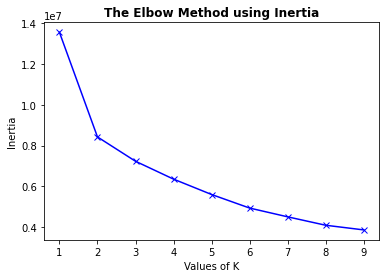

In [74]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
 
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia', fontweight='bold')
plt.show()

In [75]:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_train)
pred = kmeans.predict(X_train)
X_train['cluster'] = pred
X_train['Loan Status'] = y_train.values

pred1 = kmeans.predict(X_test)
X_test['cluster'] = pred1

cat_cols.append('cluster')

In [76]:
X_train = X_train.loc[:, ~X_train.columns.isin(['Loan Status'])].copy()

In [77]:
X_train[cat_cols] = X_train[cat_cols].astype(int)
X_test[cat_cols] = X_test[cat_cols].astype(int)
cat_cols_indices = [X_train.columns.get_loc(col) for col in cat_cols]
print(cat_cols_indices)

[5, 7, 8, 9, 11, 12, 14, 15, 16, 17, 21, 26, 27, 339]


In [78]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

# Model Building and Evaluation

In [79]:
def ModelClassifier(model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest)
    print("accuracy score: ", accuracy_score(Ytest, y_pred))
    plot_confusion_matrix(model, Xtest, Ytest)
    print(classification_report(Ytest, y_pred))
    print("Train data accuracy score: ", model.score(X_train, y_train))
    print("Test data accuracy score: ", model.score(X_test, y_test))

In [80]:
print(f"Before Upsampling of training data, counts of 0: {sum(y_train== 0)}")
print(f"Before Upsampling of training data, counts of 1: {sum(y_train== 1)}")
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy= 1, k_neighbors= 5, random_state= 42)  

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print(f"After Upsampling of training data, counts of 0: {sum(y_train_res== 0)}")
print(f"After Upsampling of training data, counts of 1: {sum(y_train_res== 1)}")

Before Upsampling of training data, counts of 0: 48977
Before Upsampling of training data, counts of 1: 4993
After Upsampling of training data, counts of 0: 48977
After Upsampling of training data, counts of 1: 48977


accuracy score:  0.9075075965315349
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12245
           1       0.00      0.00      0.00      1248

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train data accuracy score:  0.9075782842319807
Test data accuracy score:  0.9075075965315349


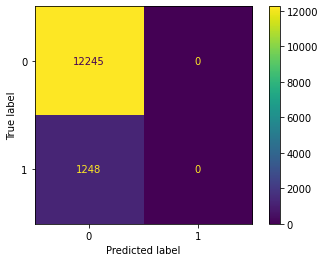

In [81]:
rfClass = RandomForestClassifier(n_estimators= 30, max_depth= 10)
ModelClassifier(rfClass, X_train, y_train, X_test, y_test)

accuracy score:  0.7982657674349662


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.87      0.89     12245
           1       0.10      0.14      0.12      1248

    accuracy                           0.80     13493
   macro avg       0.50      0.50      0.50     13493
weighted avg       0.83      0.80      0.81     13493

Train data accuracy score:  0.9056512877524551
Test data accuracy score:  0.7982657674349662


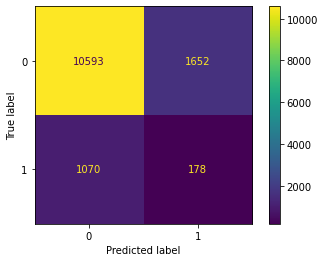

In [82]:
rfClass = RandomForestClassifier(n_estimators= 30, max_depth= 15)
ModelClassifier(rfClass, X_train_res, y_train_res, X_test, y_test)

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [84]:
param_rf = { "bootstrap": [True, False], "max_depth": (3, 17), "n_estimators": (10, 30)}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyper Parameters:
 {'bootstrap': False, 'max_depth': 17, 'n_estimators': 30}
Train data accuracy score:  0.9661473752986095
Test data accuracy score:  0.8094567553546284


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe07235b710>


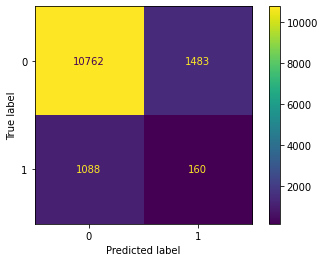

In [85]:
rfClass = RandomForestClassifier(random_state = 0, n_jobs= -1)
model= GridSearchCV(rfClass, param_rf, cv=5, n_jobs= -1, verbose=1)
model.fit(X_train_res, y_train_res)

print("Best Hyper Parameters:\n", model.best_params_)
print("Train data accuracy score: ", model.score(X_train_res, y_train_res))
print("Test data accuracy score: ", model.score(X_test, y_test))
print("Confusion Matrix: ", plot_confusion_matrix(model, X_test, y_test))

## Naive Bayes Classifier: 

In [86]:
from sklearn.naive_bayes import GaussianNB

accuracy score:  0.2872600607722523
              precision    recall  f1-score   support

           0       0.90      0.24      0.38     12245
           1       0.09      0.75      0.16      1248

    accuracy                           0.29     13493
   macro avg       0.50      0.49      0.27     13493
weighted avg       0.83      0.29      0.36     13493



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train data accuracy score:  0.29027237354085605
Test data accuracy score:  0.2872600607722523


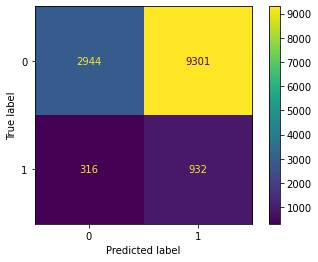

In [87]:
nb = GaussianNB()
ModelClassifier(nb, X_train_res, y_train_res, X_test, y_test)

In [88]:
param_grid_nb = {'var_smoothing': np.logspace(9,-9, num= 100)}

In [89]:
nb = GaussianNB()
nbModel_grid = GridSearchCV(nb, cv=10, n_jobs=-1, param_grid = param_grid_nb, verbose=1)
nbModel_grid.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+09, 6.57933225e+08, 4.32876128e+08, 2.84803587e+08,
       1.87381742e+08, 1.23284674e+08, 8.11130831e+07, 5.33669923e+07,
       3.51119173e+07, 2.31012970e+07, 1.51991108e+07, 1.00000000e+07,
       6.57933225e+06, 4.32876128e+06, 2.84803587e+06, 1.87381742e+06,
       1.23284674e+06, 8.111308...
       1.51991108e-05, 1.00000000e-05, 6.57933225e-06, 4.32876128e-06,
       2.84803587e-06, 1.87381742e-06, 1.23284674e-06, 8.11130831e-07,
       5.33669923e-07, 3.51119173e-07, 2.31012970e-07, 1.51991108e-07,
       1.00000000e-07, 6.57933225e-08, 4.32876128e-08, 2.84803587e-08,
       1.87381742e-08, 1.23284674e-08, 8.11130831e-09, 5.33669923e-09,
       3.51119173e-09, 2.31012970e-09, 1.51991108e-09, 1.00000000e-09])},
             verbose=1)

Best Hyper Parameters:
 {'var_smoothing': 2.848035868435793e-06}
Train data accuracy score:  0.6077546603507769
Test data accuracy score:  0.400281627510561


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe068f9c550>


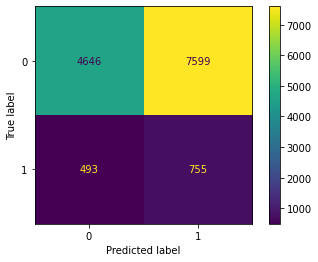

In [90]:
print("Best Hyper Parameters:\n", nbModel_grid.best_params_)
print("Train data accuracy score: ", nbModel_grid.score(X_train_res, y_train_res))
print("Test data accuracy score: ", nbModel_grid.score(X_test, y_test))
print("Confusion Matrix: ", plot_confusion_matrix(nbModel_grid, X_test, y_test))

### Logistic Regression with L2 Regularisation

accuracy score:  0.6124657229674646
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     12245
           1       0.09      0.35      0.14      1248

    accuracy                           0.61     13493
   macro avg       0.50      0.50      0.45     13493
weighted avg       0.83      0.61      0.69     13493



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train data accuracy score:  0.6100796738929035
Test data accuracy score:  0.6124657229674646


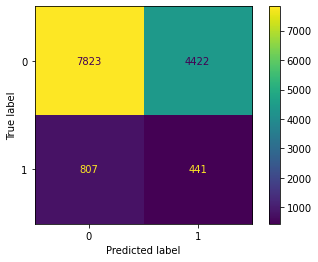

In [91]:
logReg = LogisticRegression('l2')
ModelClassifier(logReg, X_train_res, y_train_res, X_test, y_test)

accuracy score:  0.554361520788557


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.56      0.70     12245
           1       0.10      0.45      0.16      1248

    accuracy                           0.55     13493
   macro avg       0.50      0.51      0.43     13493
weighted avg       0.83      0.55      0.65     13493

Train data accuracy score:  0.6984065221419307
Test data accuracy score:  0.554361520788557


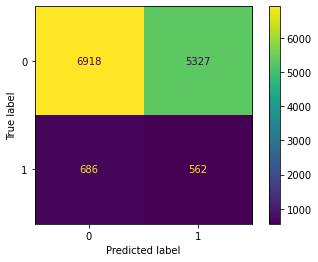

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
ModelClassifier(KNN, X_train_res, y_train_res, X_test, y_test)

In [93]:
from sklearn.linear_model import RidgeClassifier

accuracy score:  0.6125398354702438
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     12245
           1       0.09      0.36      0.15      1248

    accuracy                           0.61     13493
   macro avg       0.50      0.50      0.45     13493
weighted avg       0.83      0.61      0.69     13493



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train data accuracy score:  0.6112655178803039
Test data accuracy score:  0.6125398354702438


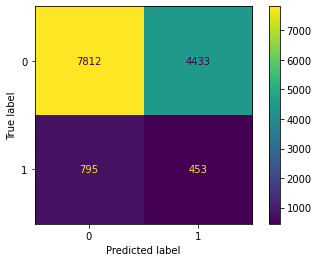

In [94]:
ridge= RidgeClassifier()
ModelClassifier(ridge, X_train_res, y_train_res, X_test, y_test)

In [ ]:

!pip install six
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

In [ ]:
stacks = StackingClassifier(classifiers= [GaussianNB(), KNeighborsClassifier()], meta_classifier= LogisticRegression())
ModelClassifier(stacks, X_train_res, y_train_res, X_test, y_test)

### Pipeline Construction

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
X = data
Y = data_y
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,stratify=Y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train= y_train.astype('int64')
y_test = y_test.astype('int64')

In [ ]:
col_trans = ColumnTransformer([('ohs', OneHotEncoder(sparse= False, handle_unknown= 'ignore'), ['Term', 'Employment Duration', 'Public Record', 'Initial List Status']), ('ss', StandardScaler(), ['Funded Amount Investor', 'Open Account', 'Total Received Late Fee'])], remainder= 'passthrough')

In [ ]:
col_trans.fit(X_train)

In [105]:
sm = SMOTE(sampling_strategy=1, k_neighbors= 5, random_state= 42)
pipeline = Pipeline([('preprocessor', col_trans), ('sm', sm), ('algo', RandomForestClassifier())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohs',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Term',
                                                   'Employment Duration',
                                                   'Public Record',
                                                   'Initial List Status']),
                                                 ('ss', StandardScaler(),
                                                  ['Funded Amount Investor',
                                                   'Open Account',
                                                   'Total Received Late '
                                                   'Fee'])])),
                ('sm', SMOTE(random_state=42, samp

In [106]:
prediction= pipeline.predict(X_test)
print(f"Train data accuracy score: {pipeline.score(X_train, y_train)}")
print(f"Test data accuracy score: {pipeline.score(X_test, y_test)}")

Train data accuracy score: 1.0
Test data accuracy score: 0.9072852590231972


In [107]:
sm = SMOTE(sampling_strategy=1, k_neighbors= 5, random_state= 42)
pipeline = Pipeline([('preprocessor', col_trans), ('sm', sm), ('algo', GaussianNB())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohs',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Term',
                                                   'Employment Duration',
                                                   'Public Record',
                                                   'Initial List Status']),
                                                 ('ss', StandardScaler(),
                                                  ['Funded Amount Investor',
                                                   'Open Account',
                                                   'Total Received Late '
                                                   'Fee'])])),
                ('sm', SMOTE(random_state=42, samp

In [108]:
prediction= pipeline.predict(X_test)
print(f"Train data accuracy score: {pipeline.score(X_train, y_train)}")
print(f"Test data accuracy score: {pipeline.score(X_test, y_test)}")

Train data accuracy score: 0.1764869371873263
Test data accuracy score: 0.17631364411176165


In [109]:
sm = SMOTE(sampling_strategy=1, k_neighbors= 5, random_state= 42)
pipeline = Pipeline([('preprocessor', col_trans), ('sm', sm), ('algo', LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohs',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Term',
                                                   'Employment Duration',
                                                   'Public Record',
                                                   'Initial List Status']),
                                                 ('ss', StandardScaler(),
                                                  ['Funded Amount Investor',
                                                   'Open Account',
                                                   'Total Received Late '
                                                   'Fee'])])),
                ('sm', SMOTE(random_state=42, samp

In [110]:
prediction= pipeline.predict(X_test)
print(f"Train data accuracy score: {pipeline.score(X_train, y_train)}")
print(f"Test data accuracy score: {pipeline.score(X_test, y_test)}")

Train data accuracy score: 0.49699833240689273
Test data accuracy score: 0.493737493515156
